In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as img
import cv2

In [3]:
pwd

'/content'

[[1 1 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [1 1 1 ... 0 1 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 1 1 ... 0 1 0]
 [1 0 1 ... 1 1 1]]


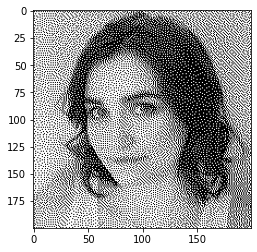

In [4]:
js_image = img.open('/content/drive/MyDrive/DataSet/Pictures-classification-2/train/AD/C4D03AQE-FXWP-Kf9EQ.png')
plt.imshow(js_image)
js_array = np.array(js_image)
js_image = js_image.convert("1")
js_array = np.array(js_image)
js_array = np.array(js_image) + 0
plt.imshow(js_image)
print(js_array)

In [5]:
print(js_image.size)
print(js_image.format)
print(js_image.mode)

(200, 200)
None
1


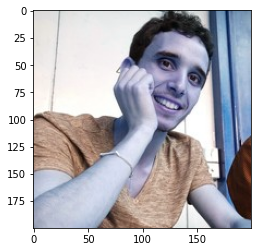

In [6]:
DATADIR = "/content/drive/MyDrive/DataSet/Pictures-classification-2/train"
CATEGORIES = ["AD", "NAD"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # path to AD or NAD
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [7]:
print(img_array.shape)

(200, 200, 3)


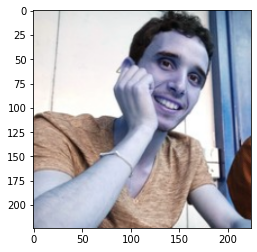

In [8]:
img_size = 224

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [9]:
print(new_array.shape)

(224, 224, 3)


In [10]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to AD or NAD
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
          img_array = cv2.imread(os.path.join(path, img))
          new_array = cv2.resize(img_array, (img_size, img_size))
          training_data.append([new_array, class_num])
      except Exception as e:
          pass
    
create_training_data()

In [11]:
print(len(training_data))

3163


In [12]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
  print(sample[1])

0
1
1
1
1
0
1
0
0
1


In [14]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size,img_size, 3)
y = np.array(y)

In [15]:
y.shape

(3163,)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:], padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=6, validation_split=0.1)

Epoch 1/6
89/89 [==============================] - 21s 93ms/step - loss: 0.7552 - accuracy: 0.6258 - val_loss: 0.6084 - val_accuracy: 0.5962
Epoch 2/6
89/89 [==============================] - 7s 76ms/step - loss: 0.5724 - accuracy: 0.6641 - val_loss: 0.5743 - val_accuracy: 0.6877
Epoch 3/6
89/89 [==============================] - 7s 75ms/step - loss: 0.5373 - accuracy: 0.7157 - val_loss: 0.6024 - val_accuracy: 0.6562
Epoch 4/6
89/89 [==============================] - 7s 75ms/step - loss: 0.4978 - accuracy: 0.7474 - val_loss: 0.6326 - val_accuracy: 0.6625
Epoch 5/6
89/89 [==============================] - 7s 76ms/step - loss: 0.4504 - accuracy: 0.7762 - val_loss: 0.6264 - val_accuracy: 0.6593
Epoch 6/6
89/89 [==============================] - 7s 75ms/step - loss: 0.3922 - accuracy: 0.8127 - val_loss: 0.6942 - val_accuracy: 0.6562


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [18]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.4 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 68.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 56.2 MB/s 
     |████████████████████████████████| 212 kB 73.8 MB/s 
     |████████████████████████████████| 253 kB 76.0 MB/s 
     |████████████████████████████████| 144 kB 59.9 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 66.7 MB/s 
     |████████████████████████████████| 11.1 MB 610 kB/s 
     |████████████████████████████████| 63 kB 534 kB/s 
     |████████████████████████████████| 80 kB 609 kB/s 
     |████████████████████████████████| 43 kB 732 kB/s 
     |████████████████████████████████| 4.0 MB

In [19]:
def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  prediction = model.predict(inp).flatten()
  # labels = ["AD", "NAD"]
  confidences = {"NAD": float(prediction[0]),"AD": 1- float(prediction[0])}
  # print(confidences)
  return confidences

In [21]:
import gradio as gr

gr.Interface(fn=classify_image, 
             inputs=gr.inputs.Image(shape=(224, 224)),
             outputs=gr.outputs.Label(num_top_classes=1)).launch()

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15124.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f34005e4f50>,
 'http://127.0.0.1:7861/',
 'https://15124.gradio.app')